In [111]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#Importing NLTK modules
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk
nltk.download('stopwords')
nltk.download('punkt')

from wordcloud import WordCloud, STOPWORDS

!pip install gensim
from gensim import corpora

!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [112]:
pwd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'/content'

In [113]:
file_path = r"NLP Analysis Data.csv"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [114]:
#Verifying if the file exists at the specified path
assert os.path.exists(file_path), 'Data file not found!'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [115]:
ds = pd.read_csv(file_path)
ds

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Filename,PPID,Day,Text
0,2_1_121.txt,2,1,?
1,2_1_122.txt,2,1,I dont remember :(
2,2_1_123.txt,2,1,"The DXA issue was being resolved, so I was enj..."
3,2_1_124.txt,2,1,"The DXA had been taken down to its parts, and ..."
4,2_1_125.txt,2,1,Relieved- the doors had been added to our spac...
...,...,...,...,...
5827,68_14_6241.txt,68,14,I was still relaxing in my room browsing the i...
5828,68_14_6242.txt,68,14,I was doing my laundry and I was a little frus...
5829,68_14_6243.txt,68,14,Before I received the prompt I was in my room....
5830,68_14_6244.txt,68,14,Before I received the prompt I was in my room....


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


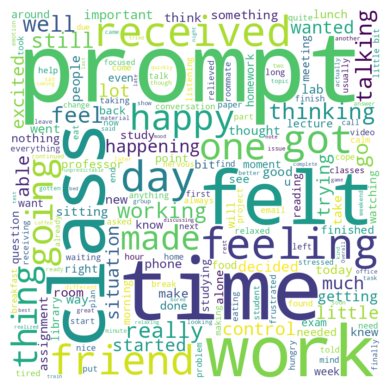

In [116]:
#Generate word cloud - to visualize the key words in the text (entire text)
#creating the join_text variable that contains one string by joining all the titles
join_text = "".join(Text for Text in ds.Text)

#defining wordcloud with join_text as argument
wc = WordCloud(stopwords= STOPWORDS, width = 800, height = 800, background_color = 'white').generate(join_text)

#Displaying the generated Word Cloud

plt.plot()
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [117]:
#Filter texts containing the word "happy"

happy_sentences = ds[ds['Text'].str.contains("happy", case = False)]['Text']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [118]:
print("Number of sentences with the word 'happy':", len(happy_sentences))

Number of sentences with the word 'happy': 1020


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [119]:
happy_sentences

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4       Relieved- the doors had been added to our spac...
8       I was telling DM about things being done in th...
9       I felt good, was preparing for a busy day of w...
17      When I received the prompt, I still did not ha...
19      When I got this email, I was sitting at my des...
                              ...                        
5824    Before I received the prompt, I had just got t...
5827    I was still relaxing in my room browsing the i...
5829    Before I received the prompt I was in my room....
5830    Before I received the prompt I was in my room....
5831    Before I received the prompt I was in my room....
Name: Text, Length: 1020, dtype: object

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


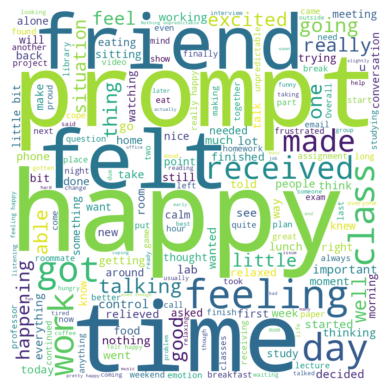

In [120]:
#Generate word cloud - to visualize the key words in the text (with "happy") without preprocessing

#creating the join_text variable that contains one string by joining all the titles
join_happy_text = "".join(Text for Text in happy_sentences)

#defining wordcloud with join_text as argument
wc_happy = WordCloud(stopwords= STOPWORDS, width = 800, height = 800, background_color = 'white').generate(join_happy_text)

#Displaying the generated Word Cloud
plt.plot()
plt.imshow(wc_happy, interpolation = 'bilinear')
plt.axis("off")
plt.show()

### PREPROCESSING THE SENTENCES WITH THE WORD "HAPPY"

In [121]:
#Defining Stop Words
stop_words = set(stopwords.words('english'))
len(stop_words)

#Defining proprocessing function
def preprocess(Text):
  list_of_tokens = word_tokenize(Text.lower())
  list_of_tokens = [word for word in list_of_tokens if word is not None and word.isalnum() and word not in stop_words]
  return list_of_tokens

#Apply the function to the Text with 'happy' or 'happy_sentences'
tokenized_sentences = happy_sentences.apply(preprocess)
#print the tokenized text
print(tokenized_sentences)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4       [doors, added, space, equipment, frustrated, t...
8       [telling, dm, things, done, current, study, th...
9       [felt, good, preparing, busy, day, work, wante...
17      [received, prompt, still, internet, becoming, ...
19      [got, email, sitting, desk, working, paperwork...
                              ...                        
5824    [received, prompt, got, physics, ils, one, fir...
5827    [still, relaxing, room, browsing, internet, ha...
5829    [received, prompt, room, five, day, weekend, w...
5830    [received, prompt, room, five, day, weekend, w...
5831    [received, prompt, room, five, day, weekend, w...
Name: Text, Length: 1020, dtype: object


In [122]:
type(tokenized_sentences)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


pandas.core.series.Series

In [124]:
#Creating a flattened list of tokenized_sentences (which is a list of lists)
flattened_list = sum(tokenized_sentences, [])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [125]:
# #Generate word cloud - to visualize the key words in the text (with "happy") after preprocessing
# from wordcloud import WordCloud, STOPWORDS

# #creating the join_text variable that contains one string by joining all the titles
# join_happy1_text = ''.join(flattened_list)

# #defining wordcloud with join_text as argument
# wc_happy1 = WordCloud(stopwords= STOPWORDS, width = 800, height = 800, background_color = 'white').generate(join_happy1_text)

# #Displaying the generated Word Cloud
# import matplotlib.pyplot as plt
# plt.plot()
# plt.imshow(wc_happy1, interpolation = 'bilinear')
# plt.axis("off")
# plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [126]:
#representing dictionary as documents
dictionary = corpora.Dictionary(tokenized_sentences)
print(dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dictionary<6704 unique tokens: ['added', 'already', 'doors', 'equipment', 'frustrated']...>


In [127]:
#CREATE CORPUS FOR LDA:
#Term Document Frequency
corpus = [dictionary.doc2bow(sentences) for sentences in tokenized_sentences]
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)], [(5, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)], [(5, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 2), (39, 1), (40, 2), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1)], [(3, 1), (4, 2), (5, 1), (9, 2), (12, 1), (15, 1), (32, 3), (37, 1), (40, 1), (43, 1), (53, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 2), (75, 2), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 2), (87, 2), (88, 1), (89, 1), (90, 2), (91, 1), (92, 1), (93, 2), (94, 1), (95, 1), (96, 2), (97, 2), 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [128]:
#Printing 10 words from the text corpus
subset_dict = [[(dictionary[id], freq) for id, freq in cor] for cor in corpus[:2]]
subset_dict[0][:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('added', 1),
 ('already', 1),
 ('doors', 1),
 ('equipment', 1),
 ('frustrated', 1),
 ('happy', 1),
 ('issue', 1),
 ('long', 1),
 ('resolved', 1),
 ('space', 1)]

In [135]:
#Defining the Latent Dirichlet Allocation (LDA) model
from gensim.models import LdaModel
num_topics = 4
model = LdaModel(corpus = corpus, num_topics=num_topics, id2word = dictionary, passes=10, random_state = 100, update_every = 1, chunksize = 100, alpha = 'symmetric', eta = 0.6)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [136]:
#printing the key words in the  num_topics
topics = model.print_topics(num_words=10)

for id, topic in topics:
  print(f"Topic {id}: {topic}")

Topic 0: 0.003*"code" + 0.003*"podcast" + 0.003*"video" + 0.003*"traffic" + 0.003*"goofing" + 0.002*"distracting" + 0.002*"sensor" + 0.002*"regrets" + 0.002*"reintroduced" + 0.002*"outlet"
Topic 1: 0.021*"happy" + 0.018*"prompt" + 0.010*"time" + 0.010*"feeling" + 0.009*"felt" + 0.009*"got" + 0.008*"class" + 0.008*"could" + 0.008*"get" + 0.008*"work"
Topic 2: 0.007*"research" + 0.006*"asked" + 0.005*"told" + 0.003*"team" + 0.003*"microeconomics" + 0.003*"emma" + 0.002*"wife" + 0.002*"kamal" + 0.002*"years" + 0.002*"university"
Topic 3: 0.006*"stwest" + 0.005*"diwali" + 0.005*"protein" + 0.004*"cook" + 0.004*"shopping" + 0.004*"kitchen" + 0.004*"km" + 0.004*"popup" + 0.003*"pizza" + 0.003*"chicken"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [137]:
#Visualize the topics
#Preparing the pyLDAvis visualization
vis = gensimvis.prepare(model, corpus, dictionary, sort_topics = False)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


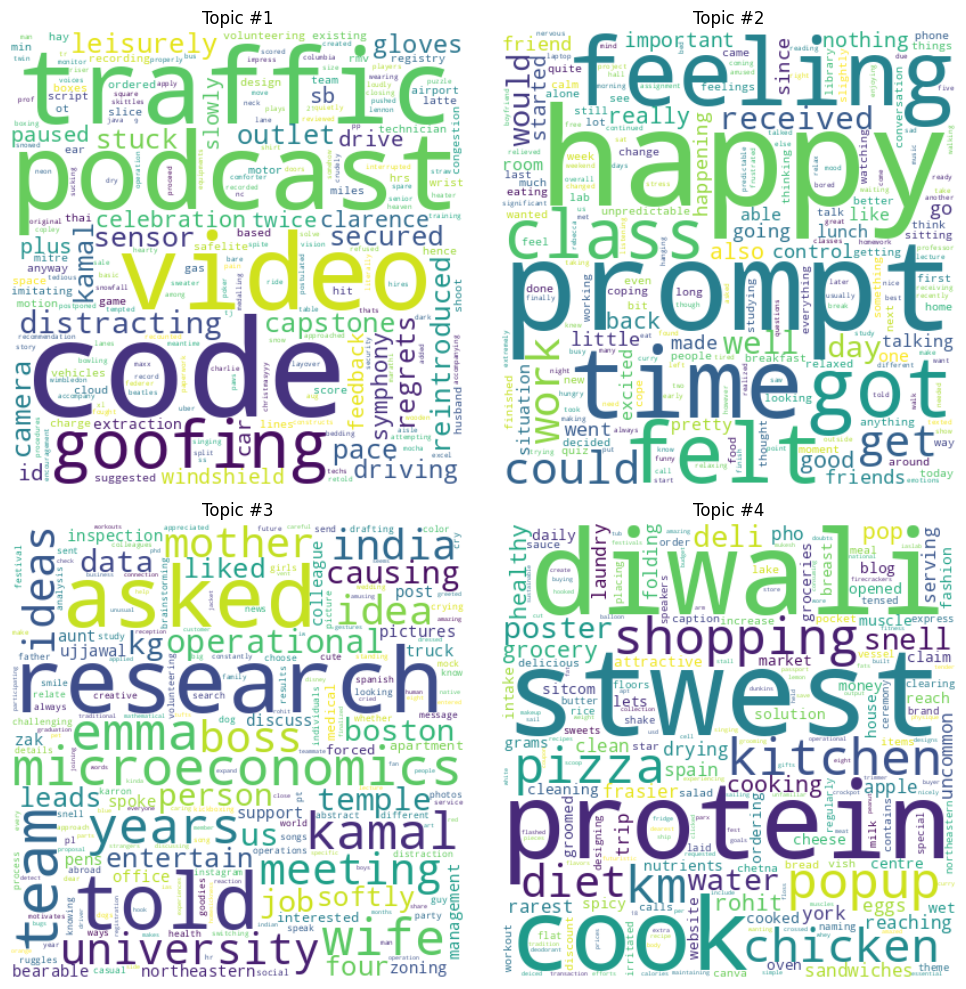

In [138]:
#Generate word clouds for each topic

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i,ax in enumerate(axes.flatten()):
    topic_num = i+1
    wc_topic_num = wc_topic_nums[i]
    wc = WordCloud(width=400, height=400, background_color='white').fit_words(dict(model.show_topic(i, 200)))
    ax.imshow(wc, interpolation = 'bilinear')
    ax.axis("off")
    ax.set_title("Topic #" + str(topic_num))
plt.tight_layout()
plt.show()

In [139]:
#Calculating Perplexity Score and Coherence Score

perp = model.log_perplexity(corpus)
print('The Perplexity Score is:', perp)

from gensim.models import CoherenceModel
coh_model = CoherenceModel(model = model, texts = tokenized_sentences, dictionary = dictionary, coherence = 'c_v')
coherence_lda = coh_model.get_coherence()
print('The Coherence Score is:', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The Perplexity Score is: -7.446559453725081
The Coherence Score is: 0.4265908579488796
